<a href="https://colab.research.google.com/github/single-spec/Data-Analysis/blob/main/OrderAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#uploading the dataset from local desktop
from google.colab import files
uploaded = files.upload()

Saving Casper_Takehome_Test_Orders.xls to Casper_Takehome_Test_Orders.xls


In [3]:
#reading the order file using pandas
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(io.BytesIO(uploaded['Casper_Takehome_Test_Orders.xls']))
df

,Date,Organic X Homepage Orders,Direct X Homepage Orders,Google Search X Homepage Orders,YouTube x Homepage Orders,Facbeook x Homepage Orders,Snapchat X Homepage Orders,Organic X Mattress Page Orders,Direct X Mattress Page Orders,Google Search X Mattress Page Orders,YouTube x Mattress Page Orders,Facbeook x Mattress Page Orders,Snapchat X Mattress Page Orders,Organic X Bedding Page Orders,Direct X Bedding Page Orders,Google Search X Bedding Page Orders,YouTube x Bedding Page Orders,Facbeook x Bedding Page Orders,Snapchat X Bedding Page Orders,Organic X Retail Locations Page Orders,Direct X Retail Locations Page Orders,Google Search X Retail Locations Page Orders,YouTube x Retail Locations Page Orders,Facbeook x Retail Locations Page Orders,Snapchat X Retail Locations Page Orders
0,2019-01-01,261,257,353,100,126,106,247,260,365,98,119,118,255,289,366,81,116,116,2,3,0,0,3,2
1,2019-01-02,261,262,363,107,137,122,258,275,364,97,126,120,266,274,354,98,136,111,1,3,6,3,4,5
2,2019-01-03,236,263,368,84,110,104,268,278,352,90,108,131,256,269,370,91,112,124,1,2,3,1,0,2
3,2019-01-04,256,291,362,102,131,121,252,271,355,99,117,123,254,284,378,91,111,118,8,4,1,2,1,2
4,2019-01-05,254,270,363,100,115,110,245,257,349,84,125,120,260,284,348,106,122,114,2,0,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2020-12-27,288,196,371,61,82,39,267,203,346,69,93,40,269,221,362,52,95,42,2,0,2,0,5,2
727,2020-12-28,279,222,361,51,80,39,264,175,375,52,76,18,266,204,359,44,78,46,0,0,0,0,2,3
728,2020-12-29,262,225,372,63,51,68,267,208,358,51,70,40,276,202,340,64,77,44,3,0,3,3,2,1
729,2020-12-30,269,203,357,80,62,49,277,223,367,64,71,29,264,231,370,47,91,42,0,2,1,0,4,0


In [4]:
#cleaning the dataset, if there are any null values it will be replaced by 0
cleaned_df = df.replace(np.nan,0)
cleaned_df.head(10)

,Date,Organic X Homepage Orders,Direct X Homepage Orders,Google Search X Homepage Orders,YouTube x Homepage Orders,Facbeook x Homepage Orders,Snapchat X Homepage Orders,Organic X Mattress Page Orders,Direct X Mattress Page Orders,Google Search X Mattress Page Orders,YouTube x Mattress Page Orders,Facbeook x Mattress Page Orders,Snapchat X Mattress Page Orders,Organic X Bedding Page Orders,Direct X Bedding Page Orders,Google Search X Bedding Page Orders,YouTube x Bedding Page Orders,Facbeook x Bedding Page Orders,Snapchat X Bedding Page Orders,Organic X Retail Locations Page Orders,Direct X Retail Locations Page Orders,Google Search X Retail Locations Page Orders,YouTube x Retail Locations Page Orders,Facbeook x Retail Locations Page Orders,Snapchat X Retail Locations Page Orders
0,2019-01-01,261,257,353,100,126,106,247,260,365,98,119,118,255,289,366,81,116,116,2,3,0,0,3,2
1,2019-01-02,261,262,363,107,137,122,258,275,364,97,126,120,266,274,354,98,136,111,1,3,6,3,4,5
2,2019-01-03,236,263,368,84,110,104,268,278,352,90,108,131,256,269,370,91,112,124,1,2,3,1,0,2
3,2019-01-04,256,291,362,102,131,121,252,271,355,99,117,123,254,284,378,91,111,118,8,4,1,2,1,2
4,2019-01-05,254,270,363,100,115,110,245,257,349,84,125,120,260,284,348,106,122,114,2,0,2,3,4,3
5,2019-01-06,272,284,354,107,139,108,274,267,355,110,131,117,266,279,369,96,115,102,3,0,1,1,4,3
6,2019-01-07,258,265,355,94,116,123,270,273,358,88,130,113,254,259,351,122,130,124,1,2,3,0,0,0
7,2019-01-08,246,269,352,103,137,118,268,257,365,92,134,121,256,283,370,124,111,120,3,0,3,3,2,2
8,2019-01-09,253,271,351,100,103,110,266,269,361,94,117,128,266,271,365,90,114,123,0,2,2,1,2,2
9,2019-01-10,272,269,355,110,124,110,270,274,364,93,94,116,272,272,368,108,122,122,2,2,0,2,2,2


In [5]:
#Sum of the total number of orders according to the traffic sources
dflist_organic = ['Organic X Homepage Orders','Organic X Mattress Page Orders','Organic X Bedding Page Orders','Organic X Retail Locations Page Orders']
dflist_direct = ['Direct X Homepage Orders','Direct X Mattress Page Orders','Direct X Bedding Page Orders','Direct X Retail Locations Page Orders']
dflist_googlesearch = ['Google Search X Homepage Orders','Google Search X Mattress Page Orders','Google Search X Bedding Page Orders','Google Search X Retail Locations Page Orders']
dflist_youtube = ['YouTube x Homepage Orders','YouTube x Mattress Page Orders','YouTube x Bedding Page Orders','YouTube x Retail Locations Page Orders']
dflist_facebook = ['Facbeook x Homepage Orders','Facbeook x Mattress Page Orders','Facbeook x Bedding Page Orders','Facbeook x Retail Locations Page Orders']
dflist_snapchat = ['Snapchat X Homepage Orders','Snapchat X Mattress Page Orders','Snapchat X Bedding Page Orders','Snapchat X Retail Locations Page Orders']

cleaned_df['Total_Organic'] = cleaned_df[dflist_organic].sum(axis=1)
cleaned_df['Total_Direct'] = cleaned_df[dflist_direct].sum(axis=1)
cleaned_df['Total_Googlesearch'] = cleaned_df[dflist_googlesearch].sum(axis=1)
cleaned_df['Total_Youtube'] = cleaned_df[dflist_youtube].sum(axis=1)
cleaned_df['Total_Facebook'] = cleaned_df[dflist_facebook].sum(axis=1)
cleaned_df['Total_Snapchat'] = cleaned_df[dflist_snapchat].sum(axis=1)

cleaned_df.head(5)

,Date,Organic X Homepage Orders,Direct X Homepage Orders,Google Search X Homepage Orders,YouTube x Homepage Orders,Facbeook x Homepage Orders,Snapchat X Homepage Orders,Organic X Mattress Page Orders,Direct X Mattress Page Orders,Google Search X Mattress Page Orders,YouTube x Mattress Page Orders,Facbeook x Mattress Page Orders,Snapchat X Mattress Page Orders,Organic X Bedding Page Orders,Direct X Bedding Page Orders,Google Search X Bedding Page Orders,YouTube x Bedding Page Orders,Facbeook x Bedding Page Orders,Snapchat X Bedding Page Orders,Organic X Retail Locations Page Orders,Direct X Retail Locations Page Orders,Google Search X Retail Locations Page Orders,YouTube x Retail Locations Page Orders,Facbeook x Retail Locations Page Orders,Snapchat X Retail Locations Page Orders,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
0,2019-01-01,261,257,353,100,126,106,247,260,365,98,119,118,255,289,366,81,116,116,2,3,0,0,3,2,765,809,1084,279,364,342
1,2019-01-02,261,262,363,107,137,122,258,275,364,97,126,120,266,274,354,98,136,111,1,3,6,3,4,5,786,814,1087,305,403,358
2,2019-01-03,236,263,368,84,110,104,268,278,352,90,108,131,256,269,370,91,112,124,1,2,3,1,0,2,761,812,1093,266,330,361
3,2019-01-04,256,291,362,102,131,121,252,271,355,99,117,123,254,284,378,91,111,118,8,4,1,2,1,2,770,850,1096,294,360,364
4,2019-01-05,254,270,363,100,115,110,245,257,349,84,125,120,260,284,348,106,122,114,2,0,2,3,4,3,761,811,1062,293,366,347


In [6]:
#Split the month and year from date to calculate the monthly and yearly average
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['year'] = cleaned_df['Date'].dt.year

cleaned_df.head(5)

,Date,Organic X Homepage Orders,Direct X Homepage Orders,Google Search X Homepage Orders,YouTube x Homepage Orders,Facbeook x Homepage Orders,Snapchat X Homepage Orders,Organic X Mattress Page Orders,Direct X Mattress Page Orders,Google Search X Mattress Page Orders,YouTube x Mattress Page Orders,Facbeook x Mattress Page Orders,Snapchat X Mattress Page Orders,Organic X Bedding Page Orders,Direct X Bedding Page Orders,Google Search X Bedding Page Orders,YouTube x Bedding Page Orders,Facbeook x Bedding Page Orders,Snapchat X Bedding Page Orders,Organic X Retail Locations Page Orders,Direct X Retail Locations Page Orders,Google Search X Retail Locations Page Orders,YouTube x Retail Locations Page Orders,Facbeook x Retail Locations Page Orders,Snapchat X Retail Locations Page Orders,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat,month,year
0,2019-01-01,261,257,353,100,126,106,247,260,365,98,119,118,255,289,366,81,116,116,2,3,0,0,3,2,765,809,1084,279,364,342,1,2019
1,2019-01-02,261,262,363,107,137,122,258,275,364,97,126,120,266,274,354,98,136,111,1,3,6,3,4,5,786,814,1087,305,403,358,1,2019
2,2019-01-03,236,263,368,84,110,104,268,278,352,90,108,131,256,269,370,91,112,124,1,2,3,1,0,2,761,812,1093,266,330,361,1,2019
3,2019-01-04,256,291,362,102,131,121,252,271,355,99,117,123,254,284,378,91,111,118,8,4,1,2,1,2,770,850,1096,294,360,364,1,2019
4,2019-01-05,254,270,363,100,115,110,245,257,349,84,125,120,260,284,348,106,122,114,2,0,2,3,4,3,761,811,1062,293,366,347,1,2019


In [7]:
#grouping by month and calculating average
month_df = cleaned_df.groupby(['month'])['Total_Organic','Total_Direct','Total_Googlesearch','Total_Youtube','Total_Facebook','Total_Snapchat'].mean()
month_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
month,,,,,,
1,789.612903,765.967742,1083.500000,270.016129,331.048387,296.838710
2,783.614035,765.228070,1080.315789,271.438596,333.263158,299.192982
3,788.129032,766.467742,1086.000000,272.241935,330.774194,297.403226
4,790.650000,765.466667,1078.216667,267.933333,330.666667,300.166667
5,798.274194,724.032258,1083.758065,238.903226,300.193548,241.629032


In [8]:
#grouping by year and calculating average
year_df = cleaned_df.groupby(['year'])['Total_Organic','Total_Direct','Total_Googlesearch','Total_Youtube','Total_Facebook','Total_Snapchat'].mean()
year_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
year,,,,,,
2019,786.221918,780.641096,1080.882192,279.961644,340.071233,318.813699
2020,804.920765,660.909836,1081.997268,202.234973,261.114754,160.773224


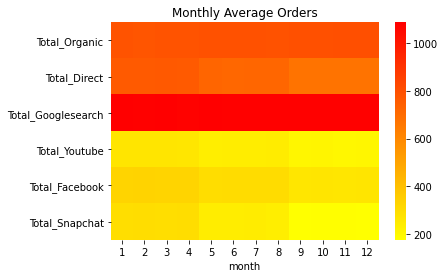

In [9]:
# plot heatmap
ax = sns.heatmap(month_df.T,cmap = 'autumn_r')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

# save figure
plt.savefig('Monthly_Average_Orders.png', dpi=100)
ax.set_title("Monthly Average Orders")
plt.show()

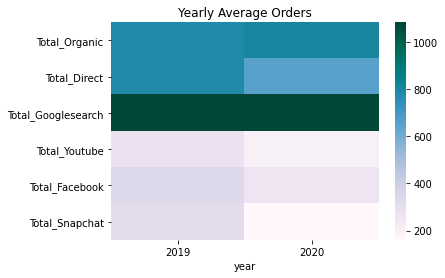

In [10]:
# plot heatmap
ax = sns.heatmap(year_df.T,cmap = 'PuBuGn')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

# save figure
plt.savefig('Yearly_Average_Orders.png', dpi=100)
ax.set_title("Yearly Average Orders")
plt.show()

In [11]:
cleaned_df.describe()

,Organic X Homepage Orders,Direct X Homepage Orders,Google Search X Homepage Orders,YouTube x Homepage Orders,Facbeook x Homepage Orders,Snapchat X Homepage Orders,Organic X Mattress Page Orders,Direct X Mattress Page Orders,Google Search X Mattress Page Orders,YouTube x Mattress Page Orders,Facbeook x Mattress Page Orders,Snapchat X Mattress Page Orders,Organic X Bedding Page Orders,Direct X Bedding Page Orders,Google Search X Bedding Page Orders,YouTube x Bedding Page Orders,Facbeook x Bedding Page Orders,Snapchat X Bedding Page Orders,Organic X Retail Locations Page Orders,Direct X Retail Locations Page Orders,Google Search X Retail Locations Page Orders,YouTube x Retail Locations Page Orders,Facbeook x Retail Locations Page Orders,Snapchat X Retail Locations Page Orders,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat,month,year
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,264.640219,239.987688,359.965800,80.225718,99.641587,79.136799,264.564979,238.477428,360.389877,79.414501,98.965800,79.592339,264.461012,240.350205,359.238030,79.580027,100.009576,79.030096,1.917921,1.878249,1.846785,1.824897,1.922025,1.926129,795.584131,720.693570,1081.440492,241.045144,300.538988,239.685363,6.519836,2019.500684
std,10.991926,26.323199,9.890783,18.157294,19.460395,33.651239,10.830428,26.543332,9.656418,19.015834,18.643084,33.617887,10.562640,26.594786,9.861825,19.016506,19.205911,34.039569,1.834627,1.840996,1.809730,1.768672,1.823197,1.727303,21.366136,75.460462,16.765676,50.978286,51.987639,98.444711,3.451913,0.500342
min,229.000000,188.000000,328.000000,31.000000,51.000000,16.000000,228.000000,175.000000,331.000000,31.000000,51.000000,18.000000,229.000000,169.000000,327.000000,27.000000,53.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,735.000000,575.000000,1030.000000,115.000000,196.000000,71.000000,1.000000,2019.000000
25%,258.000000,218.000000,353.000000,66.000000,84.000000,45.000000,258.000000,214.000000,354.000000,65.000000,83.000000,47.000000,257.000000,217.500000,353.000000,64.000000,85.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,781.000000,642.000000,1070.000000,194.000000,253.000000,132.000000,4.000000,2019.000000
50%,265.000000,239.000000,360.000000,80.000000,99.000000,79.000000,264.000000,239.000000,361.000000,80.000000,99.000000,79.000000,265.000000,240.000000,360.000000,80.000000,100.000000,79.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,796.000000,721.000000,1082.000000,240.000000,299.000000,239.000000,7.000000,2020.000000
75%,272.000000,263.000000,366.000000,94.500000,114.000000,112.000000,272.000000,263.000000,367.000000,94.000000,114.500000,113.000000,272.000000,264.500000,366.000000,94.000000,115.500000,112.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,810.000000,800.000000,1092.000000,289.000000,349.500000,349.000000,10.000000,2020.000000
max,295.000000,294.000000,392.000000,129.000000,151.000000,146.000000,296.000000,297.000000,394.000000,126.000000,141.000000,143.000000,299.000000,300.000000,388.000000,140.000000,152.000000,143.000000,10.000000,11.000000,8.000000,8.000000,9.000000,9.000000,863.000000,857.000000,1137.000000,353.000000,403.000000,413.000000,12.000000,2020.000000


In [12]:
month_df.describe()

,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,795.533607,720.866631,1081.420850,241.155636,300.664000,239.924953
std,6.497953,38.386503,2.115728,25.285398,26.580201,50.705352
min,783.614035,674.112903,1078.216667,208.566667,266.100000,176.716667
25%,790.390726,676.862500,1080.248939,213.250000,271.693548,181.440323
50%,796.610215,721.483871,1081.052688,241.831183,301.406183,241.156183
75%,799.400941,765.287719,1082.112500,268.454032,330.693548,296.979839
max,804.766667,766.467742,1086.000000,272.241935,333.263158,300.166667


In [13]:
year_df.describe()

,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,795.571341,720.775466,1081.439730,241.098308,300.592993,239.793461
std,13.222082,84.662786,0.788478,54.961056,55.830662,111.751491
min,786.221918,660.909836,1080.882192,202.234973,261.114754,160.773224
25%,790.896630,690.842651,1081.160961,221.666640,280.853874,200.283343
50%,795.571341,720.775466,1081.439730,241.098308,300.592993,239.793461
75%,800.246053,750.708281,1081.718499,260.529976,320.332113,279.303580
max,804.920765,780.641096,1081.997268,279.961644,340.071233,318.813699
